In [1]:
using Pkg
Pkg.activate("..") # activate BurgersJoint environment
Pkg.instantiate() # install all dependencies if necessary
using BurgersJoint
using BurgersJoint.BurgersEquation
using BurgersJoint.NeuralNetwork
using Plots

  Activating project at `~/Documents/ACFPD/Individual assignment/BurgersJoint`
Precompiling project...
  12454.8 ms  ✓ BurgersJoint
  1 dependency successfully precompiled in 15 seconds. 621 already precompiled.


In [ ]:
# Parameter choices:
N   = 64    # number of grid points
dt   = 1e-2   # time step
T = 3/pi    # final time
nu  = 1e-2/pi # viscosity
# with these settings, training takes around 5 min on my laptop

trainNeuralNetwork(N; nu=nu, T=T, dt=dt)
x, u_final, tvec, history = solveNeuralNetwork(N; dt=dt)

println("Simulation complete!")
println("Final time = ", tvec[end])

Simulation complete!
Final time = 1.0


[ Info: Using existing trained model.


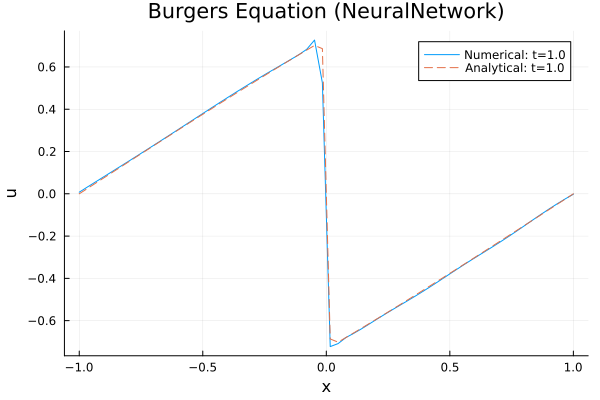

In [15]:
plt = plot(x, u_final, label="Numerical: t=$(tvec[end])", xlabel="x", ylabel="u", 
           title="Burgers Equation (NeuralNetwork)")
plot!(plt, x, analytical_solution(x, tvec[end]; nu=nu), label="Analytical: t=$(tvec[end])", 
      linestyle=:dash)
display(plt)

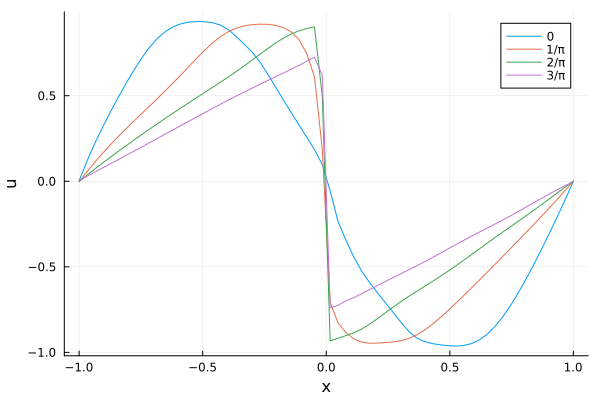

In [16]:
times_to_plot = 0:1/pi:T

plt = plot()
for (idx, t) in enumerate(times_to_plot)
    current_label = idx == 1 ? "0" : "$(idx-1)/π"
    plot!(plt, x, history[idx], label=current_label)
end
plot!(plt, xlabel="x", ylabel="u")
display(plt)